In [541]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [542]:
import missingno as mo


In [543]:
df=pd.read_csv('cancer.csv')

In [544]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [545]:
df.shape

(569, 33)

In [546]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [547]:
df.drop(columns='Unnamed: 32',axis=1,inplace=True)

In [548]:
df.drop(columns='id',axis=1,inplace=True)

In [549]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [550]:
df.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

In [551]:
df.kurtosis()

radius_mean                 0.845522
texture_mean                0.758319
perimeter_mean              0.972214
area_mean                   3.652303
smoothness_mean             0.855975
compactness_mean            1.650130
concavity_mean              1.998638
concave points_mean         1.066556
symmetry_mean               1.287933
fractal_dimension_mean      3.005892
radius_se                  17.686726
texture_se                  5.349169
perimeter_se               21.401905
area_se                    49.209077
smoothness_se              10.469840
compactness_se              5.106252
concavity_se               48.861395
concave points_se           5.126302
symmetry_se                 7.896130
fractal_dimension_se       26.280847
radius_worst                0.944090
texture_worst               0.224302
perimeter_worst             1.070150
area_worst                  4.396395
smoothness_worst            0.517825
compactness_worst           3.039288
concavity_worst             1.615253
c

In [552]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [553]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [554]:
df["diagnosis"] = pd.Categorical(df["diagnosis"])
df["diagnosis"] = df["diagnosis"].cat.codes

In [555]:
X=df.drop(labels='texture_mean',axis=1)
y=df['texture_mean']          

In [556]:
print(X)

     diagnosis  radius_mean  perimeter_mean  area_mean  smoothness_mean  \
0            1        17.99          122.80     1001.0          0.11840   
1            1        20.57          132.90     1326.0          0.08474   
2            1        19.69          130.00     1203.0          0.10960   
3            1        11.42           77.58      386.1          0.14250   
4            1        20.29          135.10     1297.0          0.10030   
..         ...          ...             ...        ...              ...   
564          1        21.56          142.00     1479.0          0.11100   
565          1        20.13          131.20     1261.0          0.09780   
566          1        16.60          108.30      858.1          0.08455   
567          1        20.60          140.10     1265.0          0.11780   
568          0         7.76           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760 

In [557]:
selector = SelectKBest(k=17)
selector.fit(X, y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = df.iloc[:,cols]

In [558]:
features_df_new.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'concavity_mean', 'fractal_dimension_mean', 'texture_se',
       'perimeter_se', 'smoothness_se', 'fractal_dimension_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'symmetry_worst'],
      dtype='object')

In [559]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [560]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [561]:
df["diagnosis"] = pd.Categorical(df["diagnosis"])
df["diagnosis"] = df["diagnosis"].cat.codes
# Change dataframe to numpy matrix
data = df.values[:, 1:]
category = df.values[:,0]

In [562]:
df.dtypes

diagnosis                     int8
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [563]:
cor=df.corr().T

In [564]:
select_correlation_features= cor['diagnosis'].sort_values(ascending=False).to_frame()[:17]

In [565]:
select_correlation_features=select_correlation_features.index.to_list()

In [566]:
select_correlation_features

['diagnosis',
 'concave points_worst',
 'perimeter_worst',
 'concave points_mean',
 'radius_worst',
 'perimeter_mean',
 'area_worst',
 'radius_mean',
 'area_mean',
 'concavity_mean',
 'concavity_worst',
 'compactness_mean',
 'compactness_worst',
 'radius_se',
 'perimeter_se',
 'area_se',
 'texture_worst']

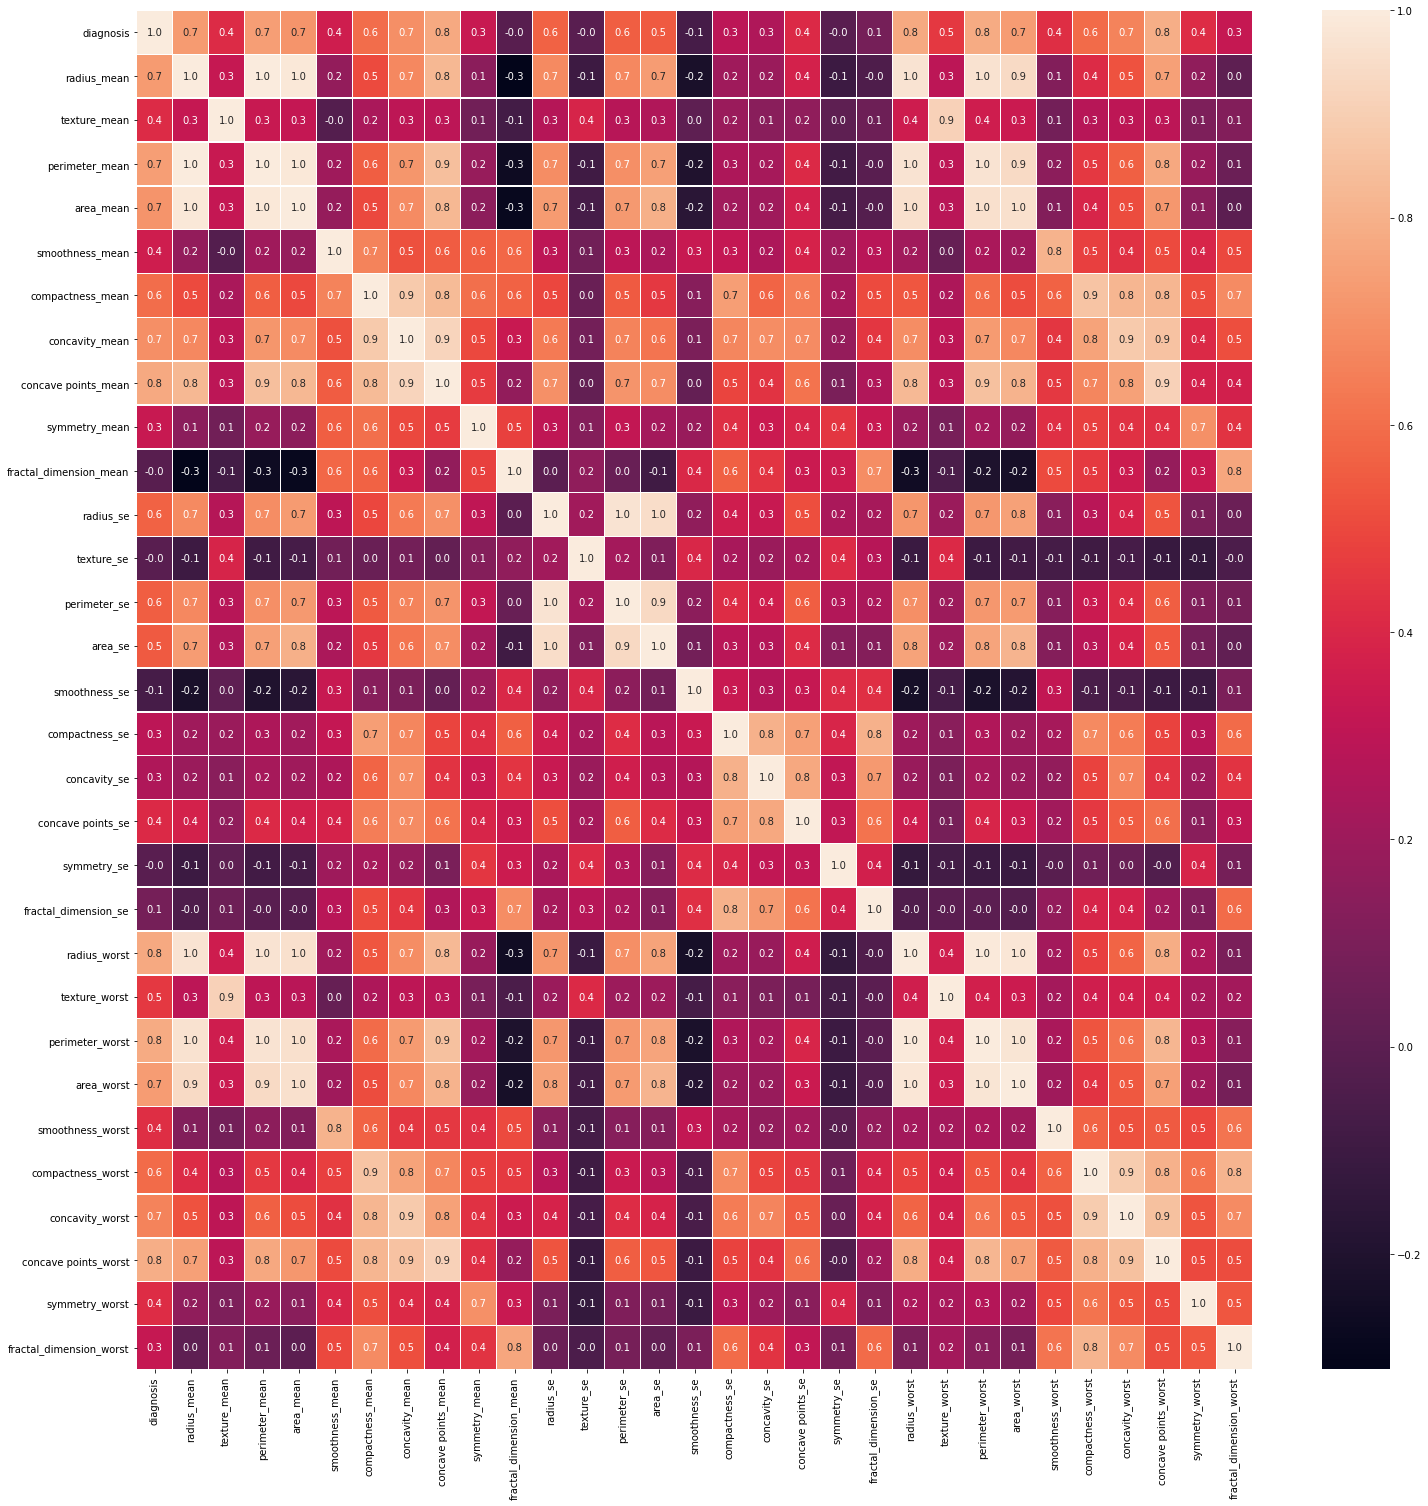

In [567]:
#correlation map
f,ax = plt.subplots(figsize=(25,25))
sb.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [568]:
"""
drop_list = ['perimeter_mean','radius_mean','compactness_mean',
             'concave points_mean','radius_se','perimeter_se',
             'radius_worst','perimeter_worst','compactness_worst',
             'concave points_worst','compactness_se','concave points_se',
             'texture_worst','area_worst','fractional_dimension_mean','concavity_mean']
new_df = df.drop(drop_list ,axis = 1 ) 
"""

"\ndrop_list = ['perimeter_mean','radius_mean','compactness_mean',\n             'concave points_mean','radius_se','perimeter_se',\n             'radius_worst','perimeter_worst','compactness_worst',\n             'concave points_worst','compactness_se','concave points_se',\n             'texture_worst','area_worst','fractional_dimension_mean','concavity_mean']\nnew_df = df.drop(drop_list ,axis = 1 ) \n"

In [569]:
features_df_new

,diagnosis,radius_mean,texture_mean,perimeter_mean,concavity_mean,fractal_dimension_mean,texture_se,perimeter_se,smoothness_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst
0,1,17.99,10.38,122.80,0.30010,0.07871,0.9053,8.589,0.006399,0.006193,25.380,17.33,184.60,0.16220,0.66560,0.7119,0.4601
1,1,20.57,17.77,132.90,0.08690,0.05667,0.7339,3.398,0.005225,0.003532,24.990,23.41,158.80,0.12380,0.18660,0.2416,0.2750
2,1,19.69,21.25,130.00,0.19740,0.05999,0.7869,4.585,0.006150,0.004571,23.570,25.53,152.50,0.14440,0.42450,0.4504,0.3613
3,1,11.42,20.38,77.58,0.24140,0.09744,1.1560,3.445,0.009110,0.009208,14.910,26.50,98.87,0.20980,0.86630,0.6869,0.6638
4,1,20.29,14.34,135.10,0.19800,0.05883,0.7813,5.438,0.011490,0.005115,22.540,16.67,152.20,0.13740,0.20500,0.4000,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,0.24390,0.05623,1.2560,7.673,0.010300,0.004239,25.450,26.40,166.10,0.14100,0.21130,0.4107,0.2060
565,1,20.13,28.25,131.20,0.14400,0.05533,2.4630,5.203,0.005769,0.002498,23.690,38.25,155.00,0.11660,0.19220,0.3215,0.2572
566,1,16.60,28.08,108.30,0.09251,0.05648,1.0750,3.425,0.005903,0.003892,18.980,34.12,126.70,0.11390,0.30940,0.3403,0.2218
567,1,20.60,29.33,140.10,0.35140,0.07016,1.5950,5.772,0.006522,0.006185,25.740,39.42,184.60,0.16500,0.86810,0.9387,0.4087


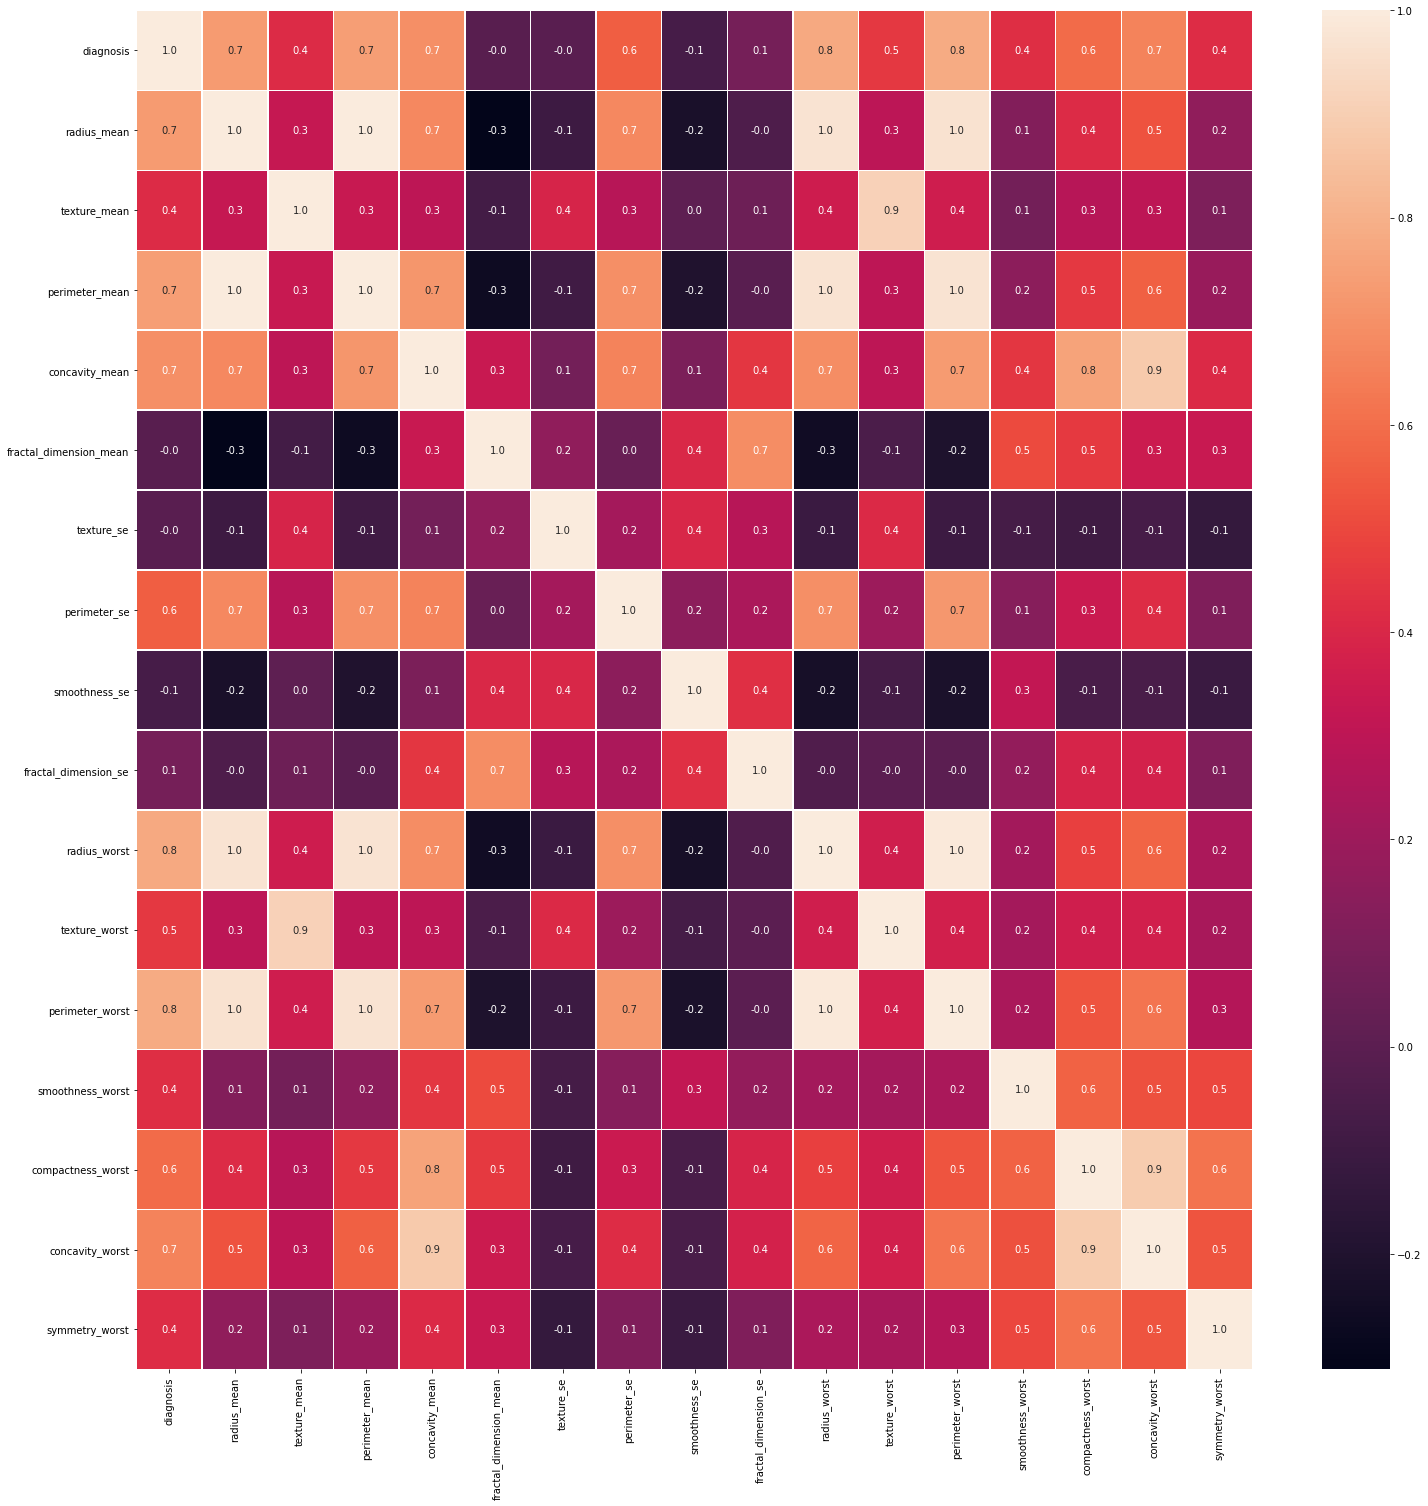

In [589]:
#correlation map
f,ax = plt.subplots(figsize=(25,25))
sb.heatmap(features_df_new.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [570]:
#features_df_new["diagnosis"] = pd.Categorical(features_df_new["diagnosis"])
#features_df_new["diagnosis"] = features_df_new["diagnosis"].cat.codes
# Change dataframe to numpy matrix
#data = features_df_new.values[:, 1:]
#category = features_df_new.values[:,0]

In [571]:
features_df_new

,diagnosis,radius_mean,texture_mean,perimeter_mean,concavity_mean,fractal_dimension_mean,texture_se,perimeter_se,smoothness_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst
0,1,17.99,10.38,122.80,0.30010,0.07871,0.9053,8.589,0.006399,0.006193,25.380,17.33,184.60,0.16220,0.66560,0.7119,0.4601
1,1,20.57,17.77,132.90,0.08690,0.05667,0.7339,3.398,0.005225,0.003532,24.990,23.41,158.80,0.12380,0.18660,0.2416,0.2750
2,1,19.69,21.25,130.00,0.19740,0.05999,0.7869,4.585,0.006150,0.004571,23.570,25.53,152.50,0.14440,0.42450,0.4504,0.3613
3,1,11.42,20.38,77.58,0.24140,0.09744,1.1560,3.445,0.009110,0.009208,14.910,26.50,98.87,0.20980,0.86630,0.6869,0.6638
4,1,20.29,14.34,135.10,0.19800,0.05883,0.7813,5.438,0.011490,0.005115,22.540,16.67,152.20,0.13740,0.20500,0.4000,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,0.24390,0.05623,1.2560,7.673,0.010300,0.004239,25.450,26.40,166.10,0.14100,0.21130,0.4107,0.2060
565,1,20.13,28.25,131.20,0.14400,0.05533,2.4630,5.203,0.005769,0.002498,23.690,38.25,155.00,0.11660,0.19220,0.3215,0.2572
566,1,16.60,28.08,108.30,0.09251,0.05648,1.0750,3.425,0.005903,0.003892,18.980,34.12,126.70,0.11390,0.30940,0.3403,0.2218
567,1,20.60,29.33,140.10,0.35140,0.07016,1.5950,5.772,0.006522,0.006185,25.740,39.42,184.60,0.16500,0.86810,0.9387,0.4087


In [572]:

#scaling the data 
#Scaling
from sklearn.preprocessing import MinMaxScaler
#data=features_df_new.drop(labels='diagnosis',axis=1)
#target=features_df_new['diagnosis']
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(features_df_new), columns=features_df_new.columns)
#dataaa = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [573]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,concavity_mean,fractal_dimension_mean,texture_se,perimeter_se,smoothness_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst
0,1.0,0.521037,0.022658,0.545989,0.703140,0.605518,0.120469,0.369034,0.159296,0.183042,0.620776,0.141525,0.668310,0.601136,0.619292,0.568610,0.598462
1,1.0,0.643144,0.272574,0.615783,0.203608,0.141323,0.082589,0.124440,0.119387,0.091110,0.606901,0.303571,0.539818,0.347553,0.154563,0.192971,0.233590
2,1.0,0.601496,0.390260,0.595743,0.462512,0.211247,0.094303,0.180370,0.150831,0.127006,0.556386,0.360075,0.508442,0.483590,0.385375,0.359744,0.403706
3,1.0,0.210090,0.360839,0.233501,0.565604,1.000000,0.175875,0.126655,0.251453,0.287205,0.248310,0.385928,0.241347,0.915472,0.814012,0.548642,1.000000
4,1.0,0.629893,0.156578,0.630986,0.463918,0.186816,0.093065,0.220563,0.332359,0.145800,0.519744,0.123934,0.506948,0.437364,0.172415,0.319489,0.157500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,0.690000,0.428813,0.678668,0.571462,0.132056,0.197976,0.325873,0.291906,0.115536,0.623266,0.383262,0.576174,0.461137,0.178527,0.328035,0.097575
565,1.0,0.622320,0.626987,0.604036,0.337395,0.113100,0.464728,0.209490,0.137879,0.055387,0.560655,0.699094,0.520892,0.300007,0.159997,0.256789,0.198502
566,1.0,0.455251,0.621238,0.445788,0.216753,0.137321,0.157974,0.125713,0.142435,0.103547,0.393099,0.589019,0.379949,0.282177,0.273705,0.271805,0.128721
567,1.0,0.644564,0.663510,0.665538,0.823336,0.425442,0.272896,0.236300,0.163477,0.182766,0.633582,0.730277,0.668310,0.619626,0.815758,0.749760,0.497142


In [574]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression,LinearRegression

In [575]:
X=data.drop(labels='texture_mean',axis=1)
y=data[['texture_mean']]

In [576]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [577]:
linreg=LinearRegression()

In [578]:
linreg.fit(X_train,y_train)

LinearRegression()

In [579]:
prediction=linreg.predict(X_test)

In [580]:
y_train_prediction=linreg.predict(X_train)

In [581]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Accuracy score for test data is:', linreg.score(X_test,y_test))
print('Accuracy score for Train data is:', linreg.score(X_train,y_train))

Accuracy score for test data is: 0.9079658826240914
Accuracy score for Train data is: 0.8972642649724467


In [582]:

print('Mean Root Squared Error for train data =', np.sqrt(mean_squared_error(y_train, y_train_prediction)))
print('Mean Root Squared Error for test data:', np.sqrt(mean_squared_error(y_test, prediction)))

Mean Root Squared Error for train data = 0.04619053390470869
Mean Root Squared Error for test data: 0.0452766009644897


In [583]:
y_test

,texture_mean
204,0.300643
70,0.392289
131,0.330402
431,0.269530
540,0.159959
...,...
486,0.241461
75,0.336152
249,0.176530
238,0.613460


In [584]:
prediction=pd.DataFrame(prediction)

In [585]:
prediction

,0
0,0.283069
1,0.351971
2,0.307969
3,0.259270
4,0.187849
...,...
109,0.305458
110,0.302722
111,0.198714
112,0.683782


In [586]:
y_test.reset_index(inplace=True)

In [587]:
y_test.drop('index',inplace=True,axis=1)

In [588]:
y_test.join(prediction)

,texture_mean,0
0,0.300643,0.283069
1,0.392289,0.351971
2,0.330402,0.307969
3,0.269530,0.259270
4,0.159959,0.187849
...,...,...
109,0.241461,0.305458
110,0.336152,0.302722
111,0.176530,0.198714
112,0.613460,0.683782
